### (0 баллов) Считываем данные

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [34]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [35]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [37]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [75]:
df_boston = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df_boston['target'] = pd.Series(dataset.target)
df_boston.head()
train, test = train_test_split(df_boston, test_size=0.1)
train.shape, test.shape

((455, 14), (51, 14))

In [76]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
432,6.44405,0.0,18.10,0.0,0.5840,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03,16.1
277,0.06127,40.0,6.41,1.0,0.4470,6.826,27.6,4.8628,4.0,254.0,17.6,393.45,4.16,33.1
312,0.26169,0.0,9.90,0.0,0.5440,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72,19.4
30,1.13081,0.0,8.14,0.0,0.5380,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,12.7
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59,35.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,5.73116,0.0,18.10,0.0,0.5320,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
488,0.15086,0.0,27.74,0.0,0.6090,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
17,0.78420,0.0,8.14,0.0,0.5380,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5


### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [232]:
categorial_features = ['CHAS']  # категориальные признаки
real_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']# вещественные признаки
common_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_feature = 'target'  # целевой признак

In [233]:
model = LinearRegression(fit_intercept=True)
model.fit(train[common_features], train[target_feature])

LinearRegression()

In [234]:
pred = model.predict(test[common_features])
pred

array([24.52988217, 29.00428173, 17.57317964, 22.81697968, 25.38850602,
       33.00005715, 22.90009401, 28.49706283, 13.23235576, 25.80386213,
       20.73866738, 15.8784469 , 11.85713514, 23.2386641 , 13.77244005,
       26.72564662, 29.07348947, 21.62610703, 28.40869284, 12.96698238,
       20.16149421, 21.55944997, 37.09194457, 23.73837915, 26.96067857,
       18.57992867,  9.07831007, 15.86348399, 13.34875508, 23.38301702,
       24.817469  , 30.73449404,  6.5414743 , 34.41459824, 33.69671822,
       18.83833378, 12.16748945, 13.615767  , 13.69073051, 13.27957316,
       21.9464678 , 24.76669165, 12.53925306, 15.07268538, 17.45777547,
        8.29419054, 35.72518315, 11.52548679, 19.79266163, 19.26215623,
       31.9113481 ])

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [235]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return ((y_real - y_pred)**2).mean()

In [236]:
print(MSE(pred, test[target_feature]))
print(mean_squared_error(pred, test[target_feature]))

23.604498968220586
23.604498968220575


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [237]:
train[target_feature].describe()

count    455.000000
mean      22.654945
std        9.167454
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: target, dtype: float64

In [238]:
def simple_pred(X):
    return np.ones((X.shape[0])) * X.mean()


In [239]:
print(MSE(simple_pred(train[target_feature]), train[target_feature]))
print(MSE(simple_pred(test[target_feature]), test[target_feature]))

83.85750851346448
88.1134332948866


Видно, что наивный алгоритм даёт гораздо худшую ошибку.


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

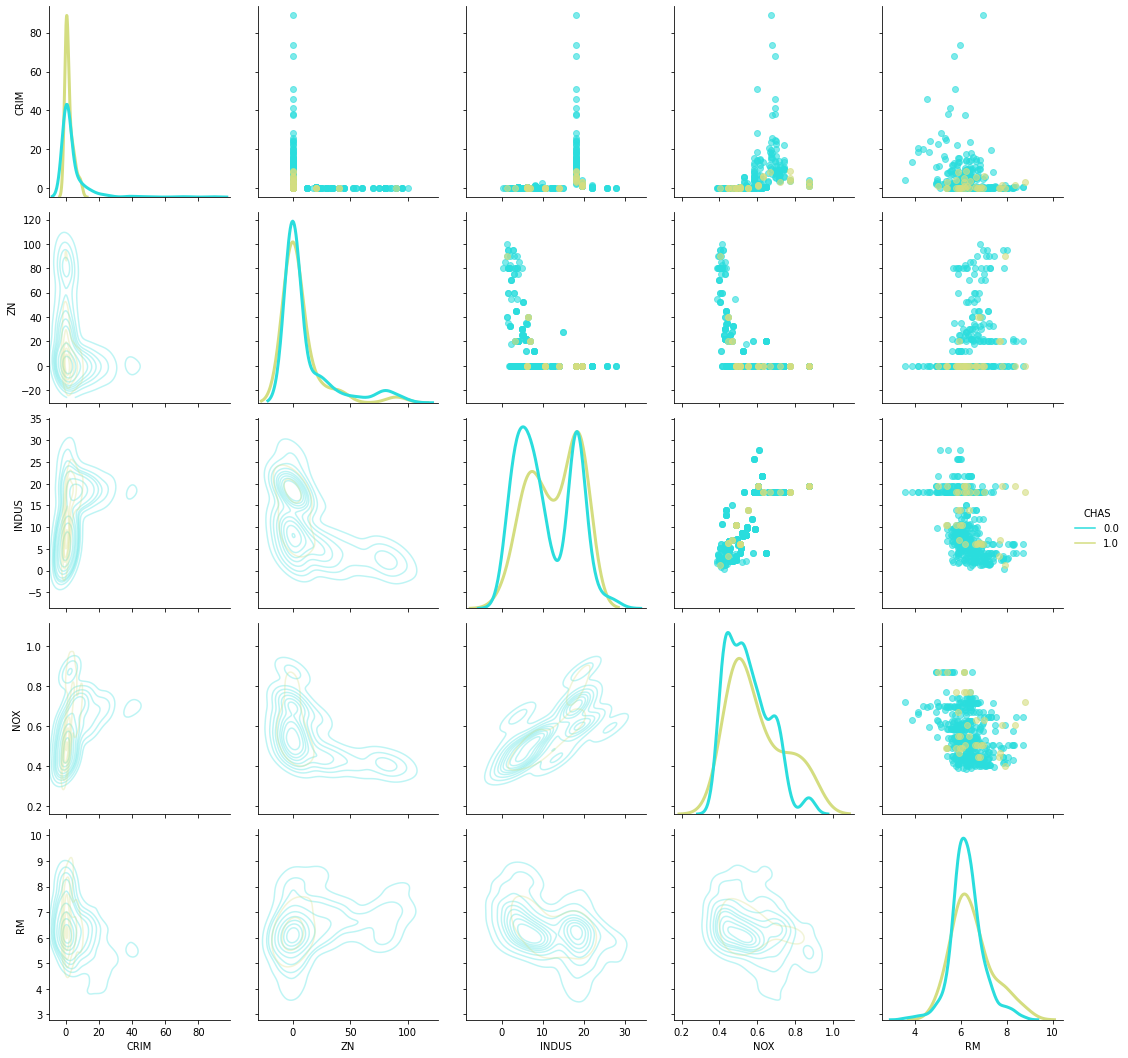

In [240]:
import seaborn as sns
for hue in categorial_features:
    g = sns.PairGrid(train[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', hue]], 
                     hue=hue, diag_sharey=False, height=3, palette="rainbow")
    
    g.map_upper(plt.scatter, alpha=0.6)
    g.map_lower(sns.kdeplot, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)
    
    g.add_legend()

In [241]:
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True).fit(train[common_features], train[target_feature])

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(train[common_features].columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))
print()


pred = reg.predict(test[common_features])
print(MSE(pred, test[target_feature]))

Сдвиг = 32.99648835087629
Коэффициент для CRIM = -0.10411066344084566
Коэффициент для ZN = 0.046842555209186794
Коэффициент для INDUS = -0.014858313484990485
Коэффициент для CHAS = 2.6865336430684326
Коэффициент для NOX = -10.567919111359984
Коэффициент для RM = 3.851202001583623
Коэффициент для AGE = -0.013999684903340583
Коэффициент для DIS = -1.4615615429006583
Коэффициент для RAD = 0.28612001534380616
Коэффициент для TAX = -0.013539885746095062
Коэффициент для PTRATIO = -0.889447952252712
Коэффициент для B = 0.008734066129403964
Коэффициент для LSTAT = -0.5066115171820195

23.61097563464313



Оптимальная lambda:
Lambda=0.00, результат=23.30


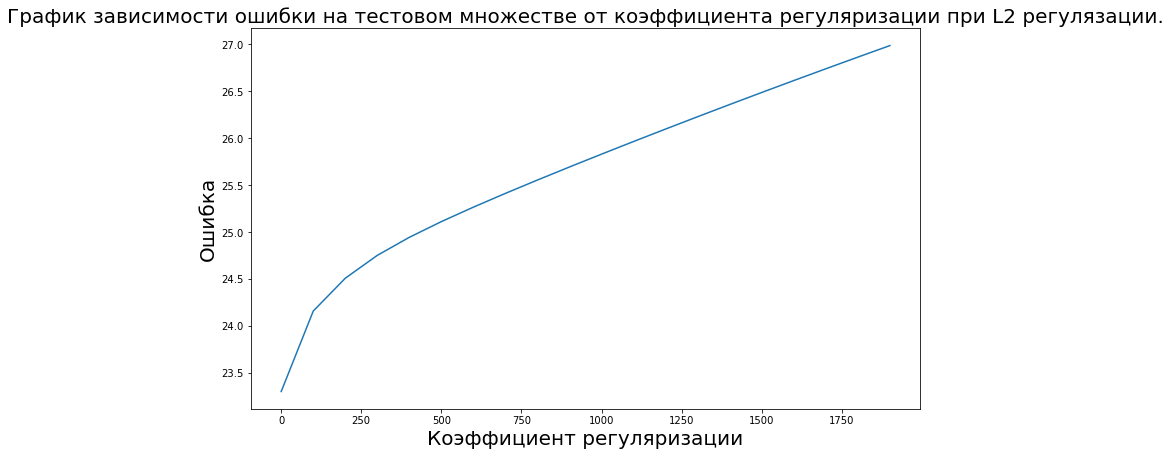

In [242]:
lambdas = np.arange(0, 2000, 100)
# Лямбды и их ошибки на обучающей выборке
lambda_errors = []
errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(fit_intercept=True, alpha=val).fit(train[real_features], train[target_feature])
    pred = reg.predict(test[real_features])
    lambda_errors.append((val, MSE(pred, test[target_feature])))
    errors.append(MSE(pred, test[target_feature]))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])



print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_train_error))


plt.figure(figsize=(12, 7))
plt.plot(lambdas, errors)
plt.xlabel('Коэффициент регуляризации', fontsize=20)
plt.ylabel('Ошибка', fontsize=20)
plt.title("График зависимости ошибки на тестовом множестве от коэффициента регуляризации при L2 регулязации.", fontsize=20)
plt.show()

Уберём признаки NOX и RM, так как они сильно влияют на target


Оптимальная lambda:
Lambda=500.00, результат=26.43


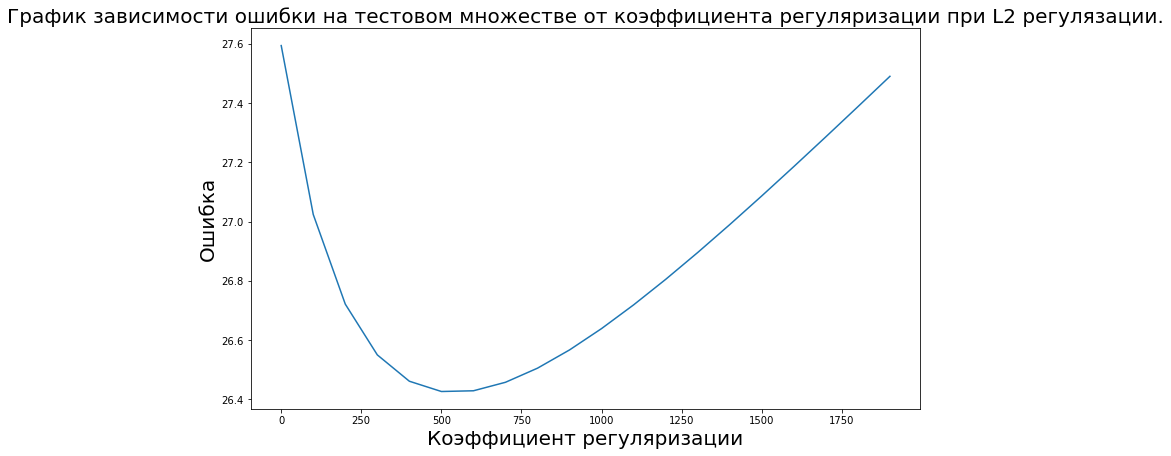

In [243]:
real_features = ['CHAS', 'CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']# вещественные признаки
lambdas = np.arange(0, 2000, 100)
# Лямбды и их ошибки на обучающей выборке
lambda_errors = []
errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(fit_intercept=True, alpha=val).fit(train[real_features], train[target_feature])
    pred = reg.predict(test[real_features])
    lambda_errors.append((val, MSE(pred, test[target_feature])))
    errors.append(MSE(pred, test[target_feature]))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])



print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_train_error))


plt.figure(figsize=(12, 7))
plt.plot(lambdas, errors)
plt.xlabel('Коэффициент регуляризации', fontsize=20)
plt.ylabel('Ошибка', fontsize=20)
plt.title("График зависимости ошибки на тестовом множестве от коэффициента регуляризации при L2 регулязации.", fontsize=20)
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

**Вывод**

Из предпоследнего графика видно, что что если рассматривать все признаки, то оптимальный коэффицент регулязации равен нулю(при нём ошибка минимальна и равна 23.3), то есть регулязация не помогает. Но если бы у нас не было признаков NOX и RM, то оптимальный коэффицент регулязации был бы равен 500(при нём ошибка минимальна и равна 26.43).